In [1]:
import psycopg2
import pandas as pd

In [2]:
#  postgresqlの接続
connection = psycopg2.connect("host=localhost port=5432 dbname=postgres user=postgres password=ckwj4187")
connection.get_backend_pid()

5808

In [3]:
# 帳票をエクセルに出力
df_table1 = pd.read_sql(sql="SELECT * FROM Tweetdata02;", con=connection)
df_table2 = pd.read_sql(sql="SELECT * FROM Tweetdata03;", con=connection)

df_table1.to_excel('output/帳票1.xlsx',sheet_name = '帳票1')
df_table2.to_excel('output/帳票2.xlsx',sheet_name = '帳票2')

In [4]:
# postgresql上のデータをDataFrame型に変換
df = pd.read_sql(sql="SELECT * FROM Tweetdata01_4;", con=connection)
df2 = pd.read_sql(sql="SELECT * FROM Tweetdata01_6;", con=connection)

# 企業ごとにデータを分割
df_a  = df[df['company_name'] == 'apple']
df_g  = df[df['company_name'] == 'Google Inc']
df_am = df[df['company_name'] == 'Amazon.com']
df_t  = df[df['company_name'] == 'Tesla Inc']
df_m  = df[df['company_name'] == 'Microsoft']
print(df)

df2_a  = df2[df2['company_name'] == 'apple']
df2_g  = df2[df2['company_name'] == 'Google Inc']
df2_am = df2[df2['company_name'] == 'Amazon.com']
df2_t  = df2[df2['company_name'] == 'Tesla Inc']
df2_m  = df2[df2['company_name'] == 'Microsoft']
print(df2)

     company_name ticker_symbol  tweet_date tweet_ymdate  tweet_num  \
0      Amazon.com          AMZN  2015-01-01      2015-01         44   
1      Amazon.com          AMZN  2015-01-02      2015-01         61   
2      Amazon.com          AMZN  2015-01-03      2015-01         47   
3      Amazon.com          AMZN  2015-01-04      2015-01         34   
4      Amazon.com          AMZN  2015-01-05      2015-01        100   
...           ...           ...         ...          ...        ...   
9130    Tesla Inc          TSLA  2019-12-28      2019-12        446   
9131    Tesla Inc          TSLA  2019-12-29      2019-12        250   
9132    Tesla Inc          TSLA  2019-12-30      2019-12        408   
9133    Tesla Inc          TSLA  2019-12-31      2019-12        621   
9134    Tesla Inc          TSLA  2020-01-01      2020-01        206   

      tweet_text_sum  tweet_comment_sum  tweet_comment_max  tweet_retweet_sum  \
0               5383                 18                 17        

<Figure size 432x288 with 0 Axes>

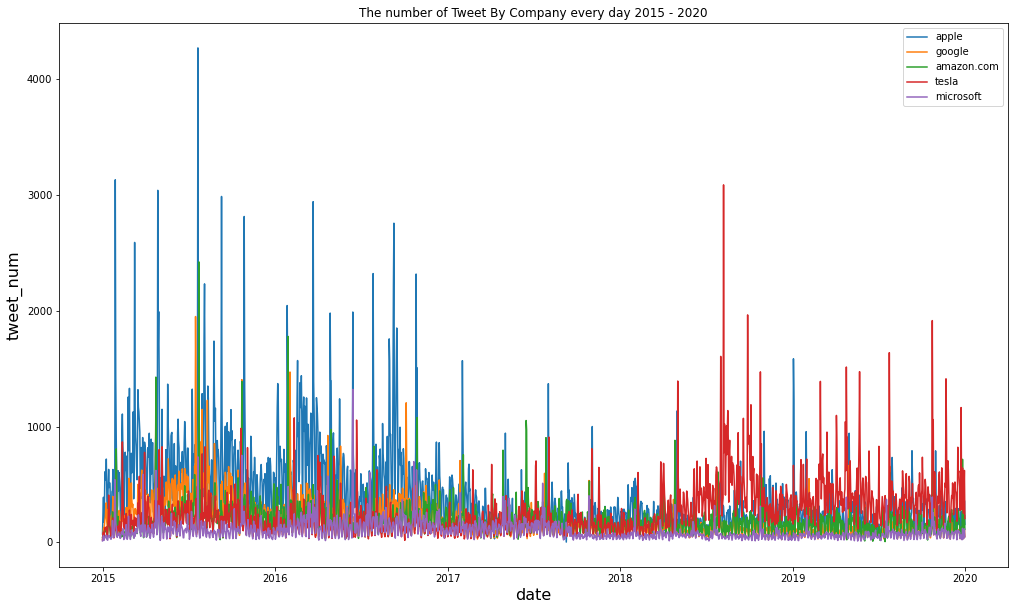

In [5]:
import matplotlib.pyplot as plt
# 1画像保存準備
fig = plt.figure()
# 企業ごとのx=ツイート日付　y=ツイート数
plt.figure(figsize=(17,10))
plt.plot(df_a['tweet_date'],df_a['tweet_num'],label='apple')
plt.plot(df_g['tweet_date'],df_g['tweet_num'],label='google')
plt.plot(df_am['tweet_date'],df_am['tweet_num'],label='amazon.com')
plt.plot(df_t['tweet_date'],df_t['tweet_num'],label='tesla')
plt.plot(df_m['tweet_date'],df_m['tweet_num'],label='microsoft')

plt.title('The number of Tweet By Company every day 2015 - 2020')
plt.xlabel('date', fontsize = 16)
plt.ylabel('tweet_num', fontsize = 16)
plt.legend()
plt.savefig("output/The number of Tweet By Company every day 2015 - 2020.png")
plt.show()

<Figure size 432x288 with 0 Axes>

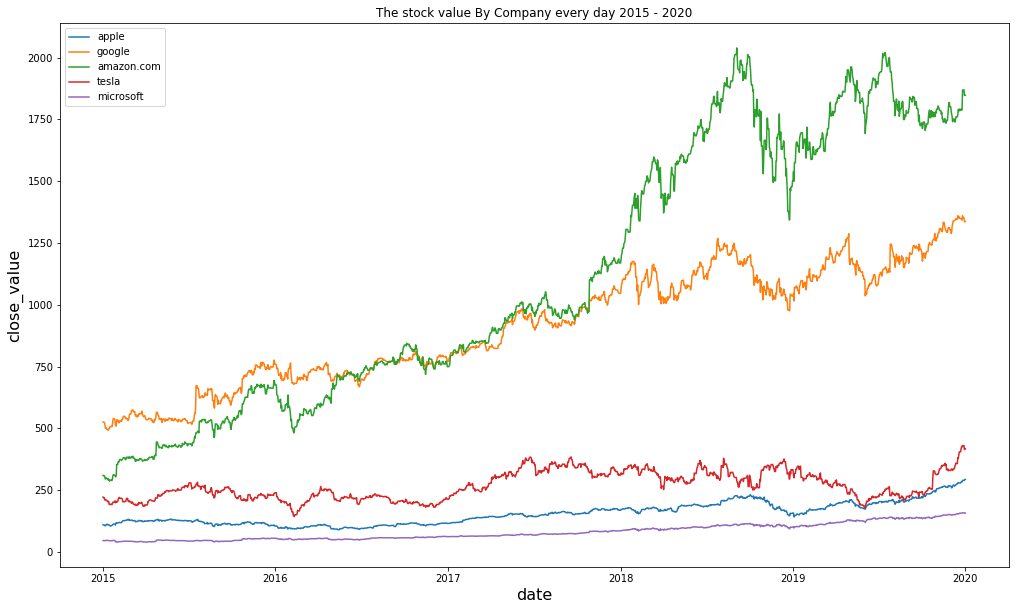

In [6]:
# 1画像保存準備
fig = plt.figure()

# 企業ごとのx=ツイート日付　y=株価
plt.figure(figsize=(17,10))
plt.plot(df_a['tweet_date'],df_a['company_value'],label='apple')
plt.plot(df_g['tweet_date'],df_g['company_value'],label='google')
plt.plot(df_am['tweet_date'],df_am['company_value'],label='amazon.com')
plt.plot(df_t['tweet_date'],df_t['company_value'],label='tesla')
plt.plot(df_m['tweet_date'],df_m['company_value'],label='microsoft')
plt.title('The stock value By Company every day 2015 - 2020')
plt.xlabel('date', fontsize = 16)
plt.ylabel('close_value', fontsize = 16)
plt.legend()
plt.savefig("output/The stock value By Company every day 2015 - 2020.png")
plt.show()

<Figure size 432x288 with 0 Axes>

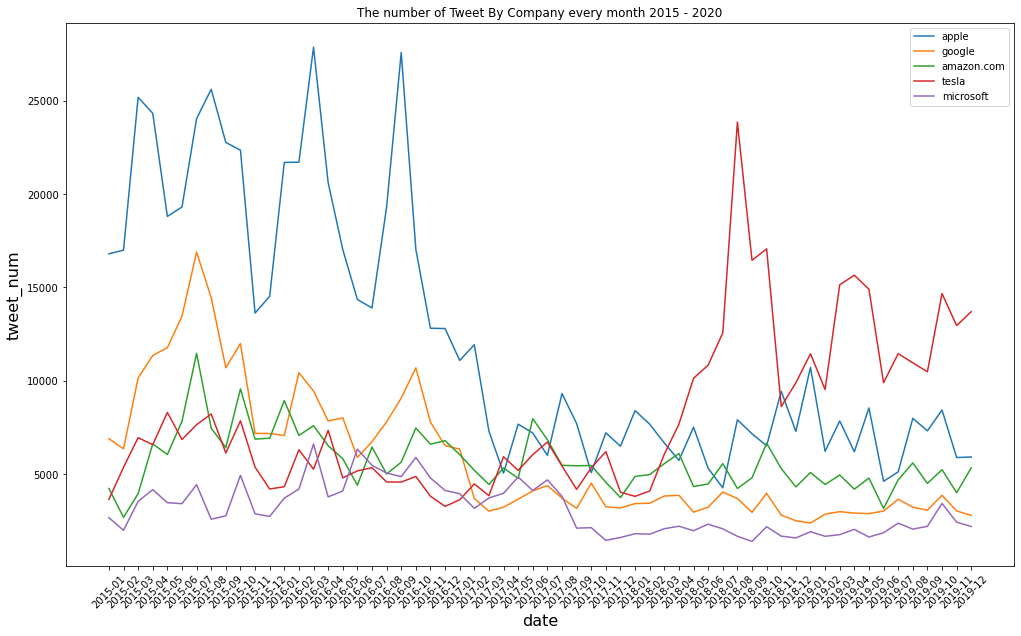

In [7]:
# 1画像保存準備
fig = plt.figure()
# 企業ごとのx=ツイート日付　y=ツイート数
plt.figure(figsize=(17,10))
plt.plot(df2_a['tweet_ymdate'],df2_a['tweet_num'],label='apple')
plt.plot(df2_g['tweet_ymdate'],df2_g['tweet_num'],label='google')
plt.plot(df2_am['tweet_ymdate'],df2_am['tweet_num'],label='amazon.com')
plt.plot(df2_t['tweet_ymdate'],df2_t['tweet_num'],label='tesla')
plt.plot(df2_m['tweet_ymdate'],df2_m['tweet_num'],label='microsoft')
plt.xticks(rotation=45)
plt.title('The number of Tweet By Company every month 2015 - 2020')
plt.xlabel('date', fontsize = 16)
plt.ylabel('tweet_num', fontsize = 16)
plt.legend()
plt.savefig("output/The number of Tweet By Company every month 2015 - 2020.png")
plt.show()

<Figure size 432x288 with 0 Axes>

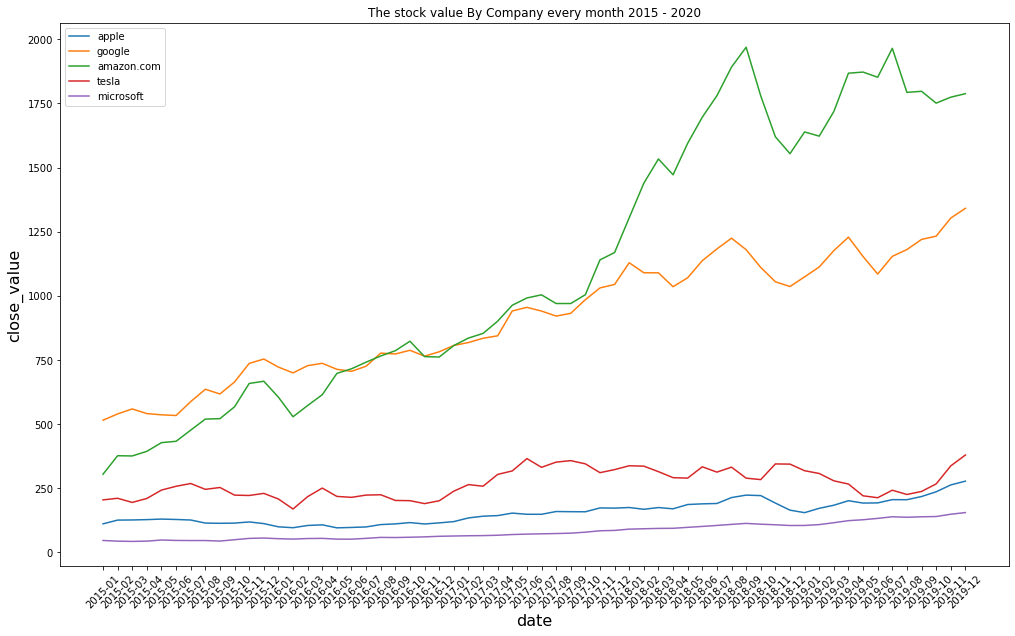

In [8]:
# 1画像保存準備
fig = plt.figure()
# 企業ごとのx=ツイート日付　y=株価
plt.figure(figsize=(17,10))
plt.plot(df2_a['tweet_ymdate'],df2_a['company_value'],label='apple')
plt.plot(df2_g['tweet_ymdate'],df2_g['company_value'],label='google')
plt.plot(df2_am['tweet_ymdate'],df2_am['company_value'],label='amazon.com')
plt.plot(df2_t['tweet_ymdate'],df2_t['company_value'],label='tesla')
plt.plot(df2_m['tweet_ymdate'],df2_m['company_value'],label='microsoft')
plt.title('The stock value By Company every month 2015 - 2020')
plt.xticks(rotation=45)
plt.xlabel('date', fontsize = 16)
plt.ylabel('close_value', fontsize = 16)
plt.legend()
plt.savefig("output/The stock value By Company every month 2015 - 2020.png")
plt.show()